# 实训 1 使用 sklearn 处理 wine 和 wine_quality 数据集

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# 使用 pandas 库读取 wine 数据集和 wine_quality 数据集

wine = pd.read_csv("../data/wine.csv", sep = ",")
wine_quality = pd.read_csv("../data/winequality.csv", sep = ";")

# 将 wine 数据集和 wine_quality 数据集的数据和标签拆分开

wine_data = wine.iloc[:,1:].values
wine_target = wine.iloc[:,0].values

wine_quality_data = wine_quality.iloc[:,:-1].values
wine_quality_target = wine_quality.iloc[:,-1].values

# 将 wine 数据集和 wine_quality 数据集划分为训练集和测试集

wine_data_train, wine_data_test, wine_target_train, wine_target_test = \
    train_test_split(wine_data, wine_target, test_size = 0.2, random_state = 42)

wine_quality_data_train, wine_quality_data_test, wine_quality_target_train, wine_quality_target_test = \
    train_test_split(wine_quality_data, wine_quality_target, test_size = 0.2, random_state = 42)

# 标准化 wine 数据集和 wine_quality 数据集

wine_stdScale = StandardScaler().fit(wine_data_train) # 生成规则
wine_trainScaler = wine_stdScale.transform(wine_data_train) # 将规则应用于训练集
wine_testScaler = wine_stdScale.transform(wine_data_test) # 将规则应用于测试集

wine_quality_stdScale = StandardScaler().fit(wine_quality_data_train) # 生成规则
wine_quality_trainScaler = wine_quality_stdScale.transform(wine_quality_data_train) # 将规则应用于训练集
wine_quality_testScaler = wine_quality_stdScale.transform(wine_quality_data_test) # 将规则应用于测试集

# 对 wine 数据集和 wine_quality 数据集进行 PCA 降维

wine_pca = PCA(n_components = 5).fit(wine_trainScaler) # 生成规则
wine_trainPca = wine_pca.transform(wine_trainScaler) # 将规则应用于训练集
wine_testPca = wine_pca.transform(wine_testScaler) # 将规则应用于测试集

wine_quality_pca = PCA(n_components = 5).fit(wine_quality_trainScaler) # 生成规则
wine_quality_trainPca = wine_quality_pca.transform(wine_quality_trainScaler) # 将规则应用于训练集
wine_quality_testPca = wine_quality_pca.transform(wine_quality_testScaler) # 将规则应用于测试集

# 实训 2 构建基于 wine 数据集的 K-Means 聚类模型

构建的 K-Means 模型为：
 KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=42, tol=0.0001, verbose=0)
wine 数据聚 3 类 FMI 评价分值为：0.583537
wine 数据聚 2 类 FMI 最优评价分值为：0.659051


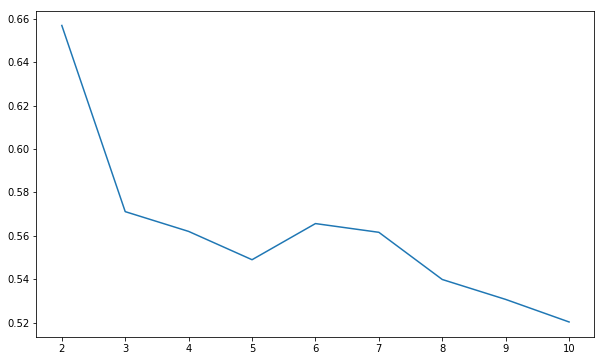

wine 数据聚 2 类轮廓系数最优评价分值为：0.656854
wine 数据聚 10 类 Calinski-Harabasz最优评价分值为：1488.485949


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import fowlkes_mallows_score
from sklearn.metrics import silhouette_score
from sklearn.metrics import calinski_harabaz_score

# 构建聚类数目为 3 的 K-Means 模型

wine = pd.read_csv("../data/wine.csv", sep = ",")

wine_data = wine.iloc[:,1:].values
wine_target = wine.iloc[:,0].values

stdScale = StandardScaler().fit(wine_data)
wine_dataScale = stdScale.transform(wine_data)

kmeans = KMeans(n_clusters = 3,random_state = 42).fit(wine_data)
print("构建的 K-Means 模型为：\n", kmeans)

# 对比真实标签和聚类标签求取 FMI

score = fowlkes_mallows_score(wine_target, kmeans.labels_)
print("wine 数据聚 3 类 FMI 评价分值为：%f" %(score))

# 在聚类数目为 2~10 类时，确定最优聚类数目

best_i = -1
best_score = -1;

for i in range(2, 11):
    kmeans = KMeans(n_clusters = i, random_state= 123).fit(wine_data)
    score = fowlkes_mallows_score(wine_target, kmeans.labels_)
    if score > best_score :
        best_i = i
        best_score = score

print("wine 数据聚 %d 类 FMI 最优评价分值为：%f" %(best_i, best_score))

# 求取模型的轮廓系数，绘制轮廓系数折线图，确定最优聚类数目

best_i = -1
best_score = -1;
silhouetteScore = []

for i in range(2, 11):
    kmeans = KMeans(n_clusters = i, random_state = 123).fit(wine_data)
    score = silhouette_score(wine_data, kmeans.labels_)
    silhouetteScore.append(score)
    if score > best_score :
        best_i = i
        best_score = score

plt.figure(figsize = (10, 6))
plt.plot(range(2, 11), silhouetteScore, linewidth = 1.5, linestyle = "-")
plt.show()

print("wine 数据聚 %d 类轮廓系数最优评价分值为：%f" %(best_i, best_score))

# 求取 Calinski-Harabasz 指数，确定最优聚类数目

best_i = -1
best_score = -1;

for i in range(2, 11):
    kmeans = KMeans(n_clusters = i, random_state = 123).fit(wine_data)
    score = calinski_harabaz_score(wine_data, kmeans.labels_)
    if score > best_score :
        best_i = i
        best_score = score

print("wine 数据聚 %d 类 Calinski-Harabasz最优评价分值为：%f" %(best_i, best_score))

# 实训 4 构建基于 wine_quality 数据集的回归模型

In [3]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import median_absolute_error
from sklearn.metrics import explained_variance_score

# 构建线性回归模型

wine_quality = pd.read_csv("../data/winequality.csv", sep = ";")

wine_quality_data = wine_quality.iloc[:,:-1].values
wine_quality_target = wine_quality.iloc[:,-1].values

X = wine_quality_data
y = wine_quality_target

X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size = 0.2, random_state = 125) # 将数据划分为训练集、测试集

clf = LinearRegression().fit(X_train, y_train)
print("建立的 Linear Regression 模型为：\n", clf)

# 构建梯度提升回归模型

wine_quality_data_train, wine_quality_data_test, wine_quality_target_train, wine_quality_target_test = \
    train_test_split(wine_quality_data, wine_quality_target, test_size = 0.2, random_state = 42)

GBR_wine_quality = GradientBoostingRegressor().fit(wine_quality_data_train, wine_quality_target_train)
print("建立的梯度提升回归模型为：\n", GBR_wine_quality)

# 结合真实评分和预测评分，计算均方误差、中值绝对误差、可解释方差值

wine_quality_target_pred = GBR_wine_quality.predict(wine_quality_data_test)
print("wine_quality 数据梯度提升回归树模型的均方误差为：", \
    mean_squared_error(wine_quality_target_test, wine_quality_target_pred))
print("wine_quality 数据梯度提升回归树模型的中值绝对误差为：", \
    median_absolute_error(wine_quality_target_test, wine_quality_target_pred))
print("wine_quality 数据梯度提升回归树模型的可解释方差值为：", \
    explained_variance_score(wine_quality_target_test, wine_quality_target_pred))

# 根据得分，判定模型的性能优劣

print("均方误差相对不合理，同时可解释方差值不接近 1，估本次构建的模型是一个不为有效的模型。")

建立的 Linear Regression 模型为：
 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)
建立的梯度提升回归模型为：
 GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False)
wine_quality 数据梯度提升回归树模型的均方误差为： 0.36361929035967694
wine_quality 数据梯度提升回归树模型的中值绝对误差为： 0.43588906297013486
wine_quality 数据梯度提升回归树模型的可解释方差值为： 0.4450449632062079
均方误差相对不合理，同时可解释方差值不接近 1，估本次构建的模型是一个不为有效的模型。
